In [12]:
# Import libraries
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.optim import optimize_acqf
from botorch.acquisition import UpperConfidenceBound
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.kernels import ScaleKernel, RBFKernel
from botorch.models.transforms.outcome import OutcomeTransform, Standardize
from botorch.models.transforms.input import InputTransform, Normalize

from gpytorch

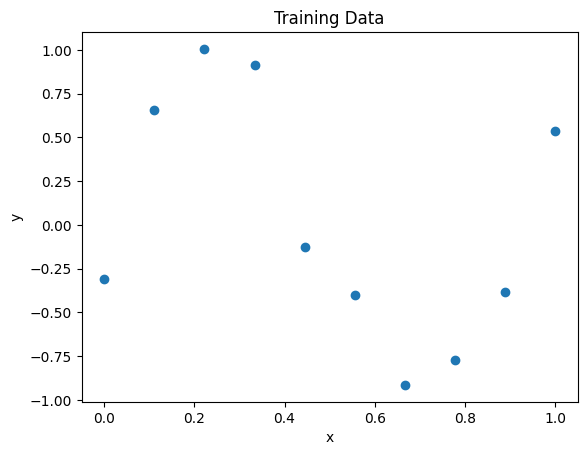

In [14]:
# Generate synthetic data
train_x = torch.linspace(0, 1, 10).unsqueeze(-1).float()
train_y = torch.sin(train_x * (2 * torch.pi)).float() + 0.2 * torch.randn_like(train_x).float()

# Plot the training data
import matplotlib.pyplot as plt

plt.plot(train_x.numpy(), train_y.numpy(), 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()


In [15]:
# Initialize the Gaussian Process model




gp_model = SingleTaskGP(train_x, train_y, outcome_transform=Standardize(m=1), input_transform=Normalize(d=1))

# Marginal log likelihood for Gaussian Processes
mll = ExactMarginalLogLikelihood(gp_model.likelihood, gp_model)

In [16]:
print(gp_model.mean_module)
print(gp_model.mean_module.constant.item())

ConstantMean()
0.0


In [17]:
fit_gpytorch_mll(mll)

ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): GammaPrior()
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): SingleTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (noise_prior): GammaPrior()
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (lengthscale_prior): GammaPrior()
        (raw_lengthscale_constraint): Positive()
      )
      (outputscale_prior): GammaPrior()
      (raw_outputscale_constraint): Positive()
    )
    (outcome_transform): Standardize()
    (input_transform): Normalize()
  )
)

In [18]:
print(gp_model.mean_module)
print(gp_model.mean_module.constant.item())

ConstantMean()
0.031152529641985893
